# Fashion MNIST - CNN v1
- 2 x Conv2D layers with padding
- 1 MaxPooling 2D layer
- 1 Dropout(0.25) layer
- 1 FCN layer
- 1 Dropout(0.5) layer
- 1 Output layer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

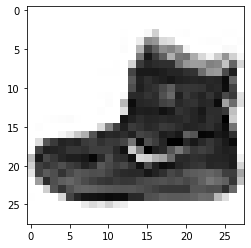

In [3]:
plt.imshow(X_train[0], cmap = "Greys")

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


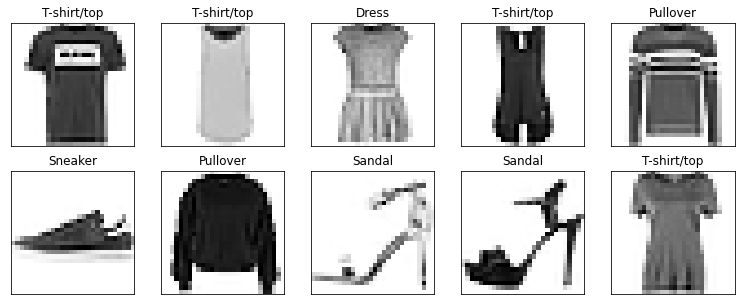

In [5]:
plt.figure(figsize = (13,5))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(X_train[i], cmap = "Greys")
    plt.title(class_names[y_train[i]])
    plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
# X_train, X_test 정규화(0 ~ 1), 이미지 차원 변경: 2차원 --> 1차원
X_train = X_train.reshape(-1, 28,28,1) / 255.
X_test = X_test.reshape(-1, 28,28,1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
# Onehot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [8]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [9]:
model = Sequential([
    Conv2D(32, kernel_size = (3,3), padding = "same", input_shape = (28, 28, 1), activation = "relu"),
    Conv2D(64, kernel_size = (3,3), padding = "same", activation = "relu"),
    MaxPooling2D(),     # MaxPooling2D(pool_size=(2,2))
    Dropout(0.25),
    Flatten(),
    Dense(512, activation = "relu"),
    Dropout(0.5),
    Dense(10, activation = "softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 512)               6423040   
                                                        

In [10]:
model.compile(optimizer = "adam",loss = "categorical_crossentropy", metrics = ["accuracy"])

In [11]:
model_path = "best-fasion-mnist-cnn-v1.h5"
mc = ModelCheckpoint(model_path, save_best_only=True, verbose = 1)
es = EarlyStopping(patience = 10)

In [12]:
hist = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100,
                 batch_size = 200, callbacks = [mc, es], verbose = 1)

Epoch 1/100
238/240 [============================>.] - ETA: 0s - loss: 0.4804 - accuracy: 0.8287
Epoch 1: val_loss improved from inf to 0.30914, saving model to best-fasion-mnist-cnn-v1.h5
240/240 [==============================] - 16s 18ms/step - loss: 0.4797 - accuracy: 0.8289 - val_loss: 0.3091 - val_accuracy: 0.8884
Epoch 2/100
240/240 [==============================] - ETA: 0s - loss: 0.3017 - accuracy: 0.8907
Epoch 2: val_loss improved from 0.30914 to 0.26676, saving model to best-fasion-mnist-cnn-v1.h5
240/240 [==============================] - 4s 17ms/step - loss: 0.3017 - accuracy: 0.8907 - val_loss: 0.2668 - val_accuracy: 0.9014
Epoch 3/100
237/240 [============================>.] - ETA: 0s - loss: 0.2470 - accuracy: 0.9104
Epoch 3: val_loss improved from 0.26676 to 0.23116, saving model to best-fasion-mnist-cnn-v1.h5
240/240 [==============================] - 4s 17ms/step - loss: 0.2473 - accuracy: 0.9103 - val_loss: 0.2312 - val_accuracy: 0.9144
Epoch 4/100
237/240 [=======

In [13]:
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2195 - accuracy: 0.9251


[0.21946321427822113, 0.9251000285148621]

In [14]:
y_acc = hist.history["accuracy"]
y_vloss = hist.history["val_loss"]
xs = np.arange(1, len(y_acc) + 1)

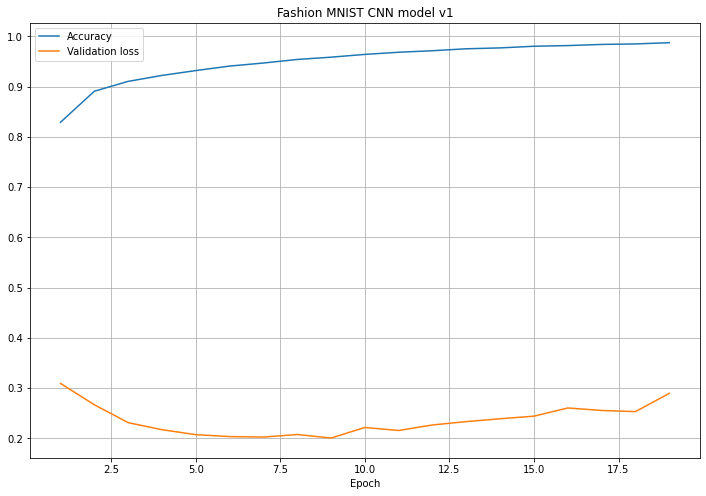

In [15]:
plt.figure(figsize = (12,8))
plt.plot(xs, y_acc, label = "Accuracy")
plt.plot(xs, y_vloss, label = "Validation loss")
plt.legend(), plt.grid(), plt.xlabel("Epoch"), plt.title("Fashion MNIST CNN model v1")
plt.show()